## This program is made to track the rigid body variablity in a tral

In [6]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

# Set the save game location
# Must have format of "../PointerExperimentData/Name_dd_mm__hh_mm_metadata" with no file extension
saveGameLocation =  "../PointerExperimentData/Ashwin_12_01__19_57_trial1" 
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')

from Experiment_pointer.experimentFunctions import processTrialData
DOFOffset = 0.03
from sklearn.decomposition import PCA
from lib_streamAndRenderDataWorkflows.config_streaming import bodyParts


In [7]:
# Fetch all trial information

rigidBodies1, cursorPos1,cursorVel1,goCues1,targetHits1,timeStamps1, minDof1,maxDof1,c = processTrialData(saveGameLocation + "_test",DOFOffset)# make this test 
rigidBodies2, cursorPos2,cursorVel2,goCues2,targetHits2,timeStamps2, minDof2,maxDof2,d = processTrialData(saveGameLocation + "_training1",DOFOffset)
rigidBodies3, cursorPos3,cursorVel3,goCues3,targetHits3,timeStamps3, minDof3,maxDof3,e = processTrialData(saveGameLocation + "_training2",DOFOffset)
rigidBodies4, cursorPos4,cursorVel4,goCues4,targetHits4,timeStamps4, minDof4,maxDof4,f = processTrialData(saveGameLocation + "_training3",DOFOffset)
rigidBodies5, cursorPos5,cursorVel5,goCues5,targetHits,timeStamps5, minDof5,maxDof5,g = processTrialData(saveGameLocation + "_training4",DOFOffset)

In [12]:
# Let's find the two principal components of each rigid body so reduce it from 114 to 38
rigidBodyVector = rigidBodies1 # This will later be set as an iterable
dimensionalityReducedRigidBodyVector = np.zeros((rigidBodyVector.shape[0],2*19))

for rigidBodyIdx in range(0,19):

    # Retrieve current rigid body vector
    idxStart = rigidBodyIdx * 6
    idxEnd = idxStart + 6
    currRigidBody = rigidBodyVector[:,idxStart:idxEnd]
    rigidBodyPCA = PCA(n_components=2)
    X_new = rigidBodyPCA.fit_transform(currRigidBody)
    vars = rigidBodyPCA.explained_variance_ratio_
    if len(vars) == 2:
        print("Rigid Body: {}, variance explained in PC1: {}, and in PC2: {}".format(bodyParts[rigidBodyIdx],vars[0],vars[1]))
    elif len(vars) == 3:
        print("Rigid Body: {}, variance explained in PC1: {}, and in PC2: {} , and in PC3: {}".format(bodyParts[rigidBodyIdx],vars[0],vars[1],vars[2]))
    dimensionalityReducedRigidBodyVector[:,rigidBodyIdx*2:rigidBodyIdx*2+2] = X_new
    # Run pca to get the two most common components 


Rigid Body: Pelvis, variance explained in PC1: 0.41441022857389703, and in PC2: 0.30879763983199554
Rigid Body: Ab, variance explained in PC1: 0.38543760702155483, and in PC2: 0.27546447349982706
Rigid Body: Chest, variance explained in PC1: 0.4098560936253583, and in PC2: 0.25080475511649575
Rigid Body: Neck, variance explained in PC1: 0.48450847999217667, and in PC2: 0.2156378671029628
Rigid Body: Head, variance explained in PC1: 0.4371462850293016, and in PC2: 0.27214871736063256
Rigid Body: LShoulder, variance explained in PC1: 0.4575479630098985, and in PC2: 0.2581704381123577
Rigid Body: LUArm, variance explained in PC1: 0.5494119659439629, and in PC2: 0.19903879541176114
Rigid Body: LFArm, variance explained in PC1: 0.7018147685086639, and in PC2: 0.11767718704494608
Rigid Body: LHand, variance explained in PC1: 0.7773017399997335, and in PC2: 0.09169236169492652
Rigid Body: RShoulder, variance explained in PC1: 0.5252194998141605, and in PC2: 0.20558782985382865
Rigid Body: RUA

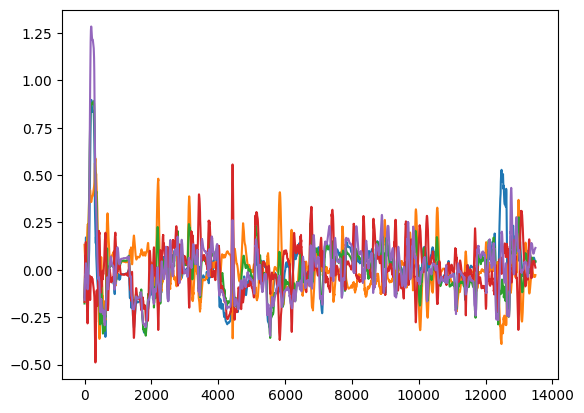

In [26]:
# Plot PC1 and PC2 for rigid bodies
plt.plot(dimensionalityReducedRigidBodyVector[:,:5])
plt.show()
